In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import load_img 

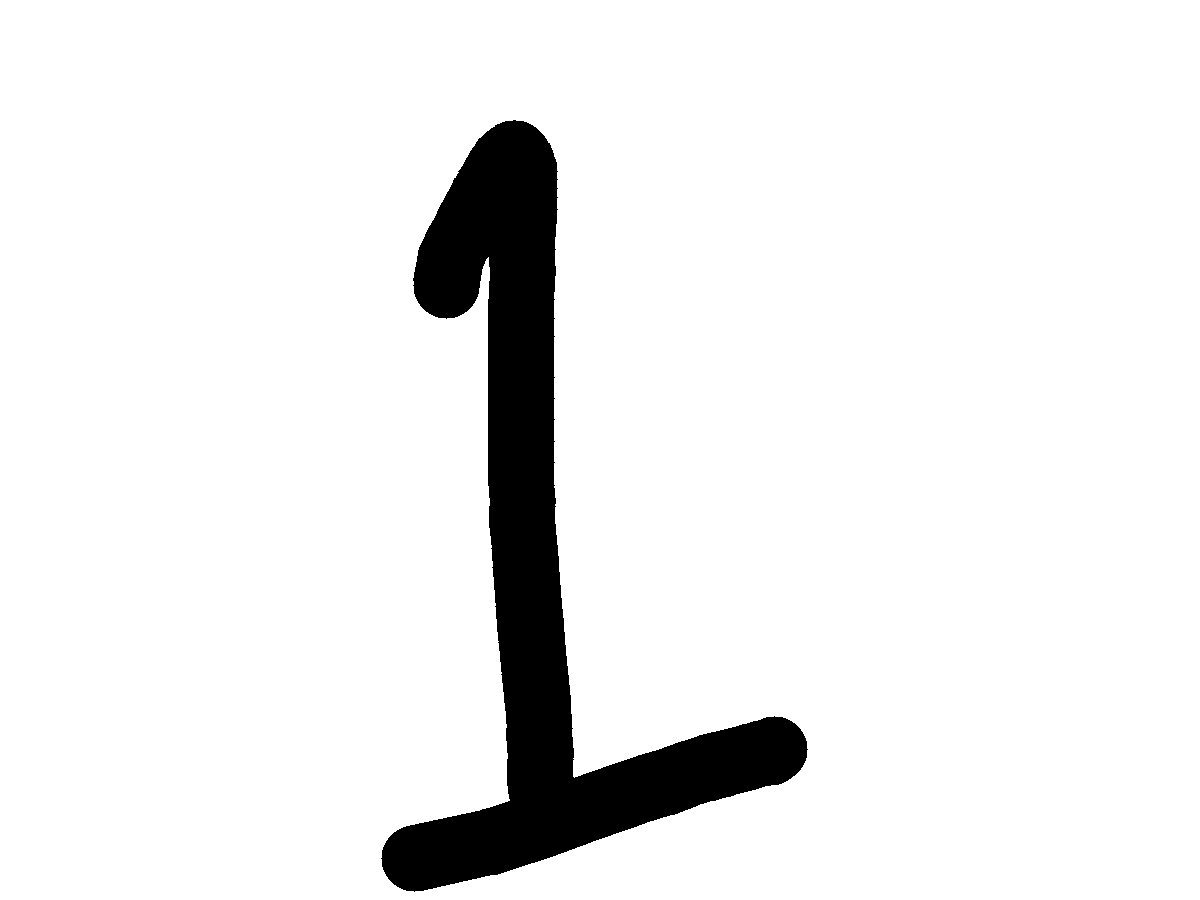

In [4]:
path = r'C:\Users\admin\Img\Training\1'
name = 'img002-003.png'
fullname = path + '/' + name
load_img(fullname)

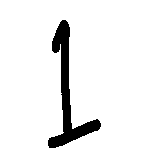

In [5]:
load_img(fullname, target_size=(150, 150))

In [6]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import decode_predictions

In [7]:
model = VGG19(
    weights='imagenet',
    input_shape=(224, 224, 3)
)

574710816/574710816 [==============================] - 1626s 3us/step


In [8]:
img = load_img(fullname, target_size=(224, 224))
x = np.array(img)
x.shape

(224, 224, 3)

In [9]:
X = np.array([x])
X.shape

(1, 224, 224, 3)

In [10]:
X = preprocess_input(X)

In [11]:
pred = model.predict(X)

1/1 [==============================] - 1s 723ms/step


In [12]:
pred.shape

(1, 1000)

In [13]:
pred[0, :10]

array([9.9567686e-08, 3.3961970e-07, 7.0334704e-06, 5.1763082e-06,
       2.9394159e-05, 5.2418623e-06, 7.7483992e-07, 8.6106422e-07,
       5.4964300e-07, 6.7047508e-06], dtype=float32)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
image_size = (224, 224)
batch_size = 32

In [16]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    r"C:\Users\admin\Img\Training",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 1549 images belonging to 62 classes.


In [17]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    r"C:\Users\admin\Img\validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 970 images belonging to 62 classes.


In [18]:
base_model = VGG19(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False
)

80134624/80134624 [==============================] - 364s 5us/step


In [19]:
base_model.trainable = False

In [20]:
inputs = keras.Input(shape=(224, 224, 3))

base = base_model(inputs, training=False)
vector = keras.layers.GlobalAveragePooling2D()(base)
inner=keras.layers.Dense(1024,activation='relu')(vector)
outputs = keras.layers.Dense(62)(inner)

model = keras.Model(inputs, outputs)

In [21]:
model

In [22]:
learning_rate = 0.001

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "VGG19_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

In [24]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds,callbacks=callbacks)

Epoch 1/10
49/49 [==============================] - 1510s 31s/step - loss: 2.7061 - accuracy: 0.4015 - val_loss: 1.2499 - val_accuracy: 0.6680
Epoch 2/10
49/49 [==============================] - 1865s 38s/step - loss: 0.8258 - accuracy: 0.7489 - val_loss: 0.9799 - val_accuracy: 0.7247
Epoch 3/10
49/49 [==============================] - 1977s 41s/step - loss: 0.5055 - accuracy: 0.8496 - val_loss: 0.9713 - val_accuracy: 0.7412
Epoch 4/10
49/49 [==============================] - 2691s 56s/step - loss: 0.3596 - accuracy: 0.8864 - val_loss: 0.9818 - val_accuracy: 0.7464
Epoch 5/10
49/49 [==============================] - 2364s 49s/step - loss: 0.2934 - accuracy: 0.9128 - val_loss: 0.8098 - val_accuracy: 0.7928
Epoch 6/10
49/49 [==============================] - 2276s 47s/step - loss: 0.2249 - accuracy: 0.9283 - val_loss: 0.7601 - val_accuracy: 0.7825
Epoch 7/10
49/49 [==============================] - 3686s 76s/step - loss: 0.1914 - accuracy: 0.9425 - val_loss: 0.8898 - val_accuracy: 0.7784

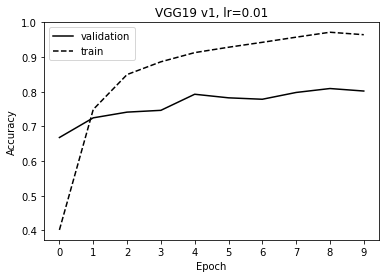

In [25]:
plt.figure(figsize=(6, 4))

epochs = history.epoch
val = history.history['val_accuracy']
train = history.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('VGG19 v1, lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(np.arange(10))

plt.legend()


plt.savefig('{VGG19}.svg')

plt.show()